# AN INTRODUCTION TO THE ZIG-ZAG SAMPLING (BY BERNARDITA RIED)

This tutorial is a guide to understanding the Zig-Zag Process, a new sampling method, described in the document <font color="black"> <b> THE ZIG-ZAG PROCESS AND SUPER-EFFICIENT
SAMPLING FOR BAYESIAN ANALYSIS OF BIG DATA</b> </font> <font color="black"> <i> Bierkens, Fearnhead and Roberts </i> </font> (23 Apr 2018)
 <a href="https://arxiv.org/abs/1607.03188"><i>arXiv 1607.03188v2</i></a>. This document is released with the aim of diffusion and share of knowledge. It includes the main algorithm, and has an overview of the theoretical statistic background, and some example codes of the algorithm.

### Author: 

#### Bernardita Ried

Bernardita is a undergraduate student of Astronomy and Physics at the Universidad de Chile. She is deeply interested into Cosmology and how we can improve the tools from Statistics and Informatics currently used in the area of the astrophysics. Through the month of January of 2019 she did her internship at CMM (Center for Mathematical Modeling of the University of Chile) in Santiago, under the supervision of Claire Delplancke, a postdoctoral investigator at CMM, and this tutorial is one of the main results of it. 

E-mail: bernarditariedg@gmail.com

## Motivation

Big Data is defined as the set of information in which volume, complexity and growth rate render difficult the capture, management and analysis. Machine Learning is the main tool used now a day in scientific investigations in order to avoid inefficiency. There is a big expectation for next decade related to the amount of data that will be released, for example, in astronomy. 

If anyone has ever asked itself how to estimate values given some sort of data, then that person must read this tutorial: It has been created to spread the last advances in Bayesian Inference, a section of Machine Learning that is used in almost every investigation area of the STEM careers.


# INTRODUCTION

This is an example of a sampled 2D Multivariate Gaussian using the ZigZag:

<img src="Images_tutorial/ZZ.png" alt="Drawing" style="width: 350px;"/>

We will make a summary of what we would need to know and the steps that need to be maked to obtain this result.


## Probability Distribution Function (PDF)

A parameter of interest is just some number that summarizes a phenomenon we are interested in.  A probability distribution is a mathematical function that provides the probabilities of occurrence of different possible outcomes in an experiment. 

Probability distributions are generally divided into two classes: A discrete case, where the set of possible outcomes is discrete, and a continuous case, where the set of possible outcomes can take on values in a continuous range. This last one is typically described by probability density functions, with the probability of any individual outcome actually being 0.

One classic example (and the one that is going to be analyzed and sampled subsequently with the ZigZag) is the normal or Gaussian distribution, wich is a very common continuous probability distribution. Normal distributions are important in statistics and are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known.

The probability density of the normal distribution is:

$$
f_{X}(x|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}}
$$

With $\mu$ the mean or expectation of the distribution (and also its median and mode), $\sigma$ the standard deviation, and $\sigma ^{2}$ the variance.

![alt text](normal.svg "Title")

## Cumulative Distribution Function (CDF)

The Cumulative Distribution Function of a real-valued random variable $X$, evaluated at $x$, is the probability that $X$ will take a value less than or equal to $x$. It is the acumulation of the PDF, and its expresion in one dimension for a continuous distribution is: 

$$
{\displaystyle F_{X}(x)=\operatorname {P} (X\leq x)} = \int _{-\infty }^{x}f_{X}(t)\,dt.
$$


<img src="Images_tutorial/normal_cdf.png" alt="Drawing" style="width: 300px;"/>

# Sampling from a Probability Distribution

Sampling in this context means to obtain random samples from a Probability Distribution. There are many ways to do it, but there are two typical families: If the distribution have an invertible CDF, then there are analytical methods, such as Inverse Transform Sampling, but if the if it is not invertible, then other computational methods must be used to get samples.

## Some typical algorithms

### Monte Carlo Methods

The Monte Carlo methods are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. Their essential idea is using randomness to solve problems that might be deterministic in principle: they generate draws from a probability distribution. When the probability distribution of the variable is parametrized, mathematicians often use a Markov chain Monte Carlo (MCMC) sampler.

The Monte Carlo simulations are just a way of estimating a fixed parameter by repeatedly generating random numbers. By taking the random numbers generated and doing some computation on them, Monte Carlo simulations provide an approximation of a parameter where calculating it directly is impossible or prohibitively expensive.

<img src="Images_tutorial/mchain.png" alt="Drawing" style="width: 200px;"/>

### Markov Chain Monte Carlo (MCMC)

The Markov Chains Monte Carlo algorithm are sequences of events that are probabilistically related to one another. Each event comes from a set of outcomes, and each outcome determines which outcome occurs next, according to a fixed set of probabilities.
 
An important feature of Markov chains is that they are memoryless: everything that you would possibly need to predict the next event is available in the current state, and no new information comes from knowing the history of events. That attribute is known as the Markov Property.

To summarize, MCMC methods pick a random parameter value to consider. The simulation will continue to generate random values (this is the Monte Carlo part), but subject to some rule for determining what makes a good parameter value. The trick is that, for a pair of parameter values, it is possible to compute which is a better parameter value, by computing how likely each value is to explain the data, given our prior beliefs. If a randomly generated parameter value is better than the last one, it is added to the chain of parameter values with a certain probability determined by how much better it is (this is the Markov chain part).

<img src="Images_tutorial/metrop.gif" alt="Drawing" style="width: 600px;"/>

## Markov Process

A Markov process (MP) is a random process in which the future is independent of the past, given the present. The basics concepts of the MP are those of the "state" of a system and state "transition". One nice example to understand this is presented by a frog in a lily pond. As time goes by, the frog jumps from one lily pad to another according to his whim of the moment. The state of the system is the number of pad currently occupied by the frog, and the state of transition is his leap.

<img src="Images_tutorial/frog.png" alt="Drawing" style="width: 500px;"/>


Intuitively the process can be seen as the limit of infinitesimal decisions made, so essentially, MP are the continuous concepts of the Markov Chain.

### ZigZag Process: a Markov Process

The ZigZag algorithm is constructed considering the ZigZag process, a special type of Markov Processbased on the Poisson Processes. The ZigZag process is a Piecewise Deterministic Markov Process which can be used in a MCMC framework to sample from a given distribution. <a href="https://arxiv.org/pdf/1712.09875.pdf"><i>Here</i></a> is a proof and a explanation of the convergence of this process to its target distribution.

# THE ALGORITHM:

Let denote  ($\xi$, $\theta$) the initial conditions (position and velocity vectors of dimension $d$). If there are $k$ iterations:

1. $(T^0, \Xi^0, \Theta^0) := (0, \xi, \theta)$

2. for $k$ = 1, 2, ...
    
    (a) Define $m_i(t) := \lambda_i(\Xi^{k-1} + \Theta^{k-1}t, \Theta^{k-1})$ for $t \geq 0$ and $i = 1, ..., d$
    
    (b) For $i = 1, ..., d$, let ($M_i$) denote computational bounds for ($m_i$)
    
    (c) Draw $\tau_1, ..., \tau_d$ such that $\mathbb{P}(\tau_i \geq t) = exp(-\int_o^t M_i(s) ds)$ 
    
    (d) $i_0$ := argmin$_{i = 1, ..., d}${$\tau_i$} and $\tau$ := $\tau_{i_0}$
    
    (e) $(T^{k}, \Xi^{k})$ := $(T^{k-1} + \tau, \Xi^{k-1} + \Theta^{k-1}\tau)$
    
    (f) With probability $m_{i_0}(\tau)/M_{i_0}(\tau)$:
        
$$
\Theta^k := F_{i_0}(\Theta^{k-1})
$$

>Otherwise:
        
$$
\Theta^k := \Theta^{k-1}
$$

With $\lambda_i(\Xi(t), \Theta(t))$ the rate function of a Poisson Process, and with $F_{i_0}(\Theta)$ a function defined by parts:

$$
F_{i_0}(\Theta) = \left\{
        \begin{array}{ll}
            -\Theta_{i} & \quad if i = i_0 \\
            \Theta_{i} & \quad if i \neq i_0
        \end{array}
    \right.
$$

Let's go step by step to understand...

# WHAT IS A PIECEWISE DETERMINISTIC MARKOV PROCESS?

The Piecewise Deterministic Markov Process (PDMP) is a continuous-time stochastic process whose behaviour is governed by random jumps at points in time, but whose evolution is deterministically governed by an ordinary differential equation (ODE) between those times.

Let's imagine a jumping frog seated at a lilly pond. There are three quantities that can be described in order to understand the dynamic of the amphibian: the equation of motion of the frog, the moment it jumps and the new direction its jump would have after landing.

Let $Z_t$ be the state of a PDMP at time $t$ and $d$ the dimensions considered, then the dynamics are defined by specifying three quantities:

## The Deterministic Dynamics:

<img src="Images_tutorial/F.png" alt="Drawing" style="width: 300px;"/>


The deterministic dynamic should be specified for each process involved: for the frog, it would be the physic behind the jump: maybe a parabolical movement as the example.

For $i = 1, ..., d$ and $\Phi(Z_t) = (\Phi_1 (Z_t), ..., \Phi_d (Z_t))$:

$$
\frac{d Z_t}{dt}^{(i)} = \Phi_i(Z_t)
$$

The function $\Phi(Z_t)$ is deterministic, so it is just necesary to solve the ODE to obtain the equations of movement.

## The Event Rate:

The random factor appears here... When does the frog jump?

<img src="Images_tutorial/waiting.png" alt="Drawing" style="width: 200px;"/>


The Events (or jumps) will occur randomly and singularly (each one is independent of the others and two events can not happen at the same time). They will occur at a rate $\lambda(Z_t)$, which depends only on the current position of the process. That frequency must be deduced from some mathematical assumptions.

## The Transition Distribution at Events:

<img src="Images_tutorial/F2.png" alt="Drawing" style="width: 300px;"/>

Whenever a transition is made, the state of the process changes according to some transitional kernel at each event, so the next state would have defined a direction to follow.

At a time $\tau$: 

$Z_{\tau^{-}} \rightarrow$ prior the event 

$Z_{\tau} \rightarrow q(\cdot , Z_{\tau^{-}})$ 


It is also necessary to specify the initial condition ($Z_{t = 0}$).

## AND A PIECEWISE DETERMINISTIC MARKOV PROCESS FOR CONTINUOUS TIME MONTE CARLO?

The MCMC, as it has been explained, works in discrete time. We now consider continuous-time versions of it, and these algorithms involve simulating a PDMP process which has a given target distribution and the ODE that describes the dynamics. A paper that explains this in a more detailed way is <a href="https://arxiv.org/pdf/1611.07873.pdf"><i>Piecewise Deterministic Markov Processes for Continuous-Time Monte Carlo</i></a>.


Taking a look to the discrete time MCMC algorithms, is possible to derive a continuous-time algorithm from a limit of a simple non-reversible discrete-time MCMC algorithm, considering the dynamics of a non accelerated particle.
For our specific algorithm we will consider only velocities of a fixed, say unit, speed, and hence v could equally be defined as a direction. 


The proposed move is a simple MCMC of a target distribution $\pi(X)$:

- From a initial position $(X_0, V_0)$, the next step in a $h$ time takes us to $(X_0 + h \cdot V_0, -V_0)$ with a probability: min{$1, \frac{\pi(X_0 + h \cdot V_0)}{\pi(X_0)}$}, like in <a href="https://wiseodd.github.io/techblog/2015/10/17/metropolis-hastings/"><i>Metropolis Hastings</i></a>


- If we let $h \rightarrow 0$ and calculate the negative loglikelihood, then the rejection changes in to:

$$
\max \{0, 1 - \exp(\log(\pi(X_0 + h \cdot V_0))-\log(\pi(X_0))) \}
$$

$$
= \max \{0, 1 - \exp(h v \nabla \log(\pi(X))+O(h)) \}
$$

$$
= \max \{0, - h v \nabla \log(\pi(X))+O(h) \}
$$

- And when $h \rightarrow 0$, rejections will occur as events in a Poisson Process of rate:

$$
\lambda(X_t, V_t) = max \{ 0, -V_t \cdot \nabla \pi(X_t) \}
$$

- With $V_t$ constant and $X_t $ changing as in a constant velocity model.

Finally, the quatities are redefined as:

## The Deterministic Dynamics:

For $i = 1, ..., d$:

$Z_t = (X_t, V_t)$, with $\frac{d X_t}{dt} ^{(i)} = V_t^{(i)}$ and $\frac{d V_t}{dt} ^{(i)} = 0$

So, for our frog, the path would be restricted to a rectilinear motion.

<img src="Images_tutorial/F3.png" alt="Drawing" style="width: 350px;"/>


## The Event Rate:

Every event of the process, will occur at a rate:

$\lambda(X_t, V_t)$ = max{$0, -V_t \cdot \nabla \pi(X_t)$}

And the time that our frog is jumping is defined by the obtained rate. The calculation of that time is made by the inversion of a Poisson Processes of rate $\lambda(X_t, V_t)$.

<img src="Images_tutorial/F4.png" alt="Drawing" style="width: 200px;"/>


## The Transition Distribution at Events:

At an event at time $\tau$: $X_{\tau} = X_{\tau^{-}}$; and $V_{\tau}$ will be drawn according to some transitional kernel. It is specific of the ZigZag Method.

Continuing with the analogy, after landing, there would be a rule for our frog that would define the direction of the next jump.

<img src="Images_tutorial/F5.png" alt="Drawing" style="width: 350px;"/>


# THE EVENT RATE IS NOT THAT EASY...


What’s a <a href="https://www.netlab.tkk.fi/opetus/s383143/kalvot/E_poisson.pdf"><i>Poisson Process</i></a> , and how is it useful?
Any time you have events which occur individually at random moments, but which tend to occur at an average rate when viewed as a group, you have a Poisson process.

The Homogeneous Poisson Process ($\lambda = constant$) can be defined in three different (but equivalent) ways:

- Poisson process is a pure birth process:
    In an infinitesimal time interval $dt$ there may occur only one arrival. This happens with the probability $\lambda dt$ independent of arrivals outside the interval.

    <img src="Images_tutorial/PP1.png" alt="Drawing" style="width: 350px;"/>

- The number of arrivals $N(t)$ in a finite interval of length $t$ obeys the $Poisson(-\lambda t)$ distribution:

    $$
    P \{ N(t) = n \} = \frac{(\lambda t)^{n}}{n!} e^{- \lambda t}
    $$

    Moreover, the number of arrivals $N(t_1, t_2)$ and $N(t_3, t_4)$ in non-overlapping intervals ($t_1 \leq t_2 \leq t_3 \leq t_4$) are independent.

    <img src="Images_tutorial/PP2.png" alt="Drawing" style="width: 350px;"/>

- The interarrival times are independent and obey the $Exp(\lambda)$ distribution:

    $$
    P \{ interarrival \hspace{0.2 cm} time > t \} = e^{-\lambda t}
    $$

    <img src="Images_tutorial/PP3.png" alt="Drawing" style="width: 350px;"/>


In our case, the process is non homogeneous Poisson Process, because the rate is a deterministic function of time: $\lambda = \lambda(t)$

<img src="Images_tutorial/PP4.png" alt="Drawing" style="width: 350px;"/>


The probability of an arrival in a short interval of time $(t, t + dt)$ is now $\lambda(t)dt + o(dt)$.

How to generate random timings for a Poisson Process? We can derive a equation called the generating times function $G_t(z)$ given the counter process $N(t) \sim Poisson(\lambda (t)$ (number of arrivals in ($0, t$)) of an non-homogeneous Poisson process. We denote the expected number of arrivals in ($0, t$) by $\Lambda(t) = \int_0^t λ(u)du$, and the value of $G_t(z)$ sould be:

$$
G_t(z) = e^{(z−1)\Lambda (t)}
$$

Because the probability of choosing a time in $\Delta T \geq t$ is:

$$
\mathbb{P}(\Delta T \geq t) = exp(-\int_0^t \lambda(u) du) = e^{-\Lambda (t)}
$$

Given the integral $\Lambda(t) = \int_0^t λ(u)du$, what if we are not able to find a easy primitive?

There are two main inversion methods used: the <a href="https://freakonometrics.hypotheses.org/724"><i>Çinlar</i></a>  method and the <a href="https://web.ics.purdue.edu/~pasupath/PAPERS/2011pasB.pdf
"><i>Poisson Thinning</i></a> method. 



If there is a known primitive: we use Çinlar's Method:

- Algorithm:
    
    1. Initialize $s$ = 0
    2. Generate $u \sim U(0,1)$
    3. set $s \rightarrow s - log(u)$
    4. set $t \rightarrow$ inf{$v: \Lambda(v) \geq s$}
    5. Deliver $t$
    6. Go to step 1.

If there is no known primitive: we use Poisson Thinning:

This is the most popular method for generating non-homogeneous PP. The Theorem states that:

Consider a non homogeneous PP with rate function $\lambda_u (t)$, with $t\geq 0$. Suppose that $T_1, T_2, ..., T_n$ are random variables representing event times from the non homogeneous PP with rate function $\lambda_u (t)$, and lying in the fixed interval (0, $t_0$]. Let $\lambda(t)$ be a rate function such that $0 \leq \lambda(t) \leq \lambda_u (t) \forall t \in $ [0, $t_0$] . If the $i^{th}$ event time $T_i$ is independently deleted with probability $1 - \frac{\lambda(t)}{\lambda_u(t)}$, for $i = 1, ..., n$, then the remaining event times form a non homogeneous PP with rate function $\lambda(t)$ in (0, $t_0$].

- Algorithm:

    1. Initialize $t$ = 0
    2. Generate $u_1 \sim U(0,1)$
    3. set $t \rightarrow t - \frac{1}{\lambda _u} log(u_1)$
    4. Generate $u_2 \sim U(0,1)$ independent of $u_1$
    5. If $u_2 \leq \lambda(t)/\lambda_u$, then deliver $t$
    6. Go to step 1.

Of course, the efficiency depends critically on how tight is the bound $\lambda_u \leq \lambda(t)$, the algorithm could be inefficient if the bound is not tight.

# ZIG-ZAG EXPLAINED:

## THE ZIG-ZAG PROCESS

It is a continuous time Markov Process whose trajectories lie in:

$$
E = \mathbb{R}^d \times \{-1, +1 \}^d
$$

denoted by:

$$
(\Xi(t), \Theta(t))_{t\geq0}
$$

At random times, a single component of $\Theta(t)$ flips:

$$
F_{i_0}(\Theta) = \left\{
        \begin{array}{ll}
            -\Theta_{i} & \quad if i = i_0 \\
            \Theta_{i} & \quad if i \neq i_0
        \end{array}
    \right.
$$

In between these switches, $\Xi(t)$ is linear with:

$$
\frac{d \Xi(t)}{dt} = \Theta(t),
$$

and $\Theta(t)$ is constant.

The rates at which the flips in $\Theta(t)$ occur are time - non-hhomogeneous. The $i^{th}$ component of $\Theta$ switches at rate:

$$
\lambda_i (\Xi(t), \Theta(t))
$$

Where $\lambda_i : E \rightarrow \mathbb{R}^{+}$, for $i = 1, ..., d$ = 1 continuous.

## CONSTRUCTION

For a given trajectory ($\xi$, $\theta$) $\in E:$

1. Let $(T^0, \Xi^0, \Theta^0) = (0, \xi, \theta)$

2. for $k$ = 1, 2, ...

    - Let $\xi ^k (t) = \Xi ^{k-1} + \Theta ^{k-1} \cdot t$; $t \geq 0$
    - for $i$ = 1, ..., $d$, let $\tau _i ^k$ be distributed according to:
        $$ 
        \mathbb{P}(\tau_i ^k \geq t) = exp(-\int_o^t \lambda_i(\xi^k (s), \Theta ^{k-1}) ds)
        $$
    - Let $i_0$ := min$_{i = 1, ..., d}${$\tau_i^k$} and let $T^k$ = $T^{k-1} + \tau^k$
    - Let $\Xi^k = \xi^k(T^k)$
    - Let 
    $$
    \Theta^k(i) := \left\{
        \begin{array}{ll}
            -\Theta^{k-1}(i) & \quad if i = i_0 \\
            \Theta^{k-1} (i) & \quad if i \neq i_0
        \end{array}
    \right.  
    $$

Finally, the skeleton points are given by:

$$
(T^k, \Xi^k, \Theta^k)^{\infty}_{k = 0}
$$

in $\mathbb{R}^{+} \times E$, with $T^k$ the times, $\Xi^k$ and $\Theta^k$ the position and velocity respectively in which the direction of the process change.

## INVARIANT DISTRIBUTION

The most important aspect of the Zig-Zag Process is that the switching rates are directly related to an easily identifiable invariant distribution. 

For some function $\Psi \in \mathcal{C}(\mathbb{R}^d)$ satisfying:

$$
\int_{\mathbb{R}^d} \exp(-\Psi(\xi)) < \infty,
$$

if the switching rates satisfy to the equations

$$
\lambda_i(\xi, \theta) - \lambda_i(\xi, F_i[\theta]) = \theta_i \partial_i \Psi(\xi) \hspace{1 cm} \forall (\xi, \theta) \in E, i = 1, .., d,
$$

then the probability distribution 
$$\mu=\exp (-\Psi(\xi))\frac{d\xi}{Z}$$
is invariant with respect to the Zig-Zag process.

And after some mathematicals tricks enumered in the paper, we achieve that the last assumption is valid if and only if, there exists a continuous function $\gamma: E \rightarrow \mathbb{R}_{+}^{d}$ such that $\forall i = 1, ..., d$ and $(\xi, \theta) \in E$, $0 \leq \gamma_i(\xi, \theta) = \gamma (\xi, F_i[\theta])$ and, for $\Psi \in \mathcal{C}^1(\mathbb{R}^d)$:

$$
\lambda_i(\xi, \theta) = \max \{0, \theta_i \partial_i \Psi(\xi) \} + \gamma_i(\xi, \theta)
$$

As long as $\gamma$ is bounded from above (Proof at the page 10 of the Zig-Zag Paper):

$$
\lambda_i(\xi, \theta) = \max \{0, \theta_i \partial_i \Psi(\xi) \} + \gamma_i(\xi)
$$

With the main ideas clear, the algorithm is ready to analyze:



# ZIG-ZAG ALGORITHM

## Input: 

There must be two given vectors of the same dimension of position and velocity. The number of parameters must be the same of the length of the vectors.

### Initial Condition of the Sequence: ($\xi$, $\theta$)

$\xi$ is the initial position, that can be any vector in the space of solutions. $\theta$ is the initial velocity, that can only have in each direction the values -1 or +1.

## Output: 

Must be a skeleton formed of three objects: the time (scalar) the positions and velocities (vectors of the same dimension).

<img src="Images_tutorial/skeleton.png" alt="Drawing" style="width: 400px;"/>


### Final Sequence of three elements: $(T, \Xi, \Theta)_{k=0}^{\infty}$

$T$ is the time, that increases through every iteration. $\Xi$ and $\Theta$ are the vectors position and velocity achieved.

If there are $k$ iterations:

1. $(T^0, \Xi^0, \Theta^0) := (0, \xi, \theta)$

2. for $k$ = 1, 2, ...
    
    (a) Define $m_i(t) := \lambda_i(\Xi^{k-1} + \Theta^{k-1}t, \Theta^{k-1})$ for $t \geq 0$ and $i = 1, ..., d$
    
    (b) For $i = 1, ..., d$, let ($M_i$) denote computational bounds for ($m_i$)
    
    (c) Draw $\tau_1, ..., \tau_d$ such that $\mathbb{P}(\tau_i \geq t) = exp(-\int_o^t M_i(s) ds)$ 
    
    (d) $i_0$ := argmin$_{i = 1, ..., d}${$\tau_i$} and $\tau$ := $\tau_{i_0}$
    
    (e) $(T^{k}, \Xi^{k})$ := $(T^{k-1} + \tau, \Xi^{k-1} + \Theta^{k-1}\tau)$
    
    (f) With probability $m_{i_0}(\tau)/M_{i_0}(\tau)$:
        
$$
\Theta^k := F_{i_0}(\Theta^{k-1})
$$

>Otherwise:
        
$$
\Theta^k := \Theta^{k-1}
$$



# STEPS OF SIMULATIONS

The way to proceed is always the same at samplings:

    I. Calculate the Gradient of the Potential of the Negative Loglikelihood.
    II. Calculate the Event Rate.
    III. Find a Computational Bound for the Event Rate.
    IV. Draw times from a Poisson Process.
    V. Compute the algorithm.
    
        

# EXAMPLES OF SIMULATIONS


## 1 DIMENSION GAUSSIAN

Let's see first a 1-D example of a Gaussian centered in zero: $N(0, \sigma ^2)$

### Calculate the Gradient of the Potential of the Negative Loglikelihood:

Likelihood: $\pi (\xi) = \frac{1}{\sqrt{2 \pi} \sigma} e^{-\frac{\xi^2}{2 \sigma^2}}$

As the Potential $\Psi(\xi)$ appears as $\pi (\xi) = \frac{1}{Z} e^{-\Psi(\xi)}$, then it is equal to:

$$
\Psi(\xi) = \frac{\xi^2}{2 \sigma^2}
$$

And the Gradient is: $\nabla \Psi(\xi) = \frac{\partial \Psi(\xi)}{\partial \xi} = \frac{\xi}{\sigma ^2}$


### Calculate the Event Rate:

We just introduce the values:

In many dimensions: $\lambda_i(\xi, \theta) = \max \{0, \theta_i \partial_i \Psi(\xi) \} + \gamma_i(\xi)$

But in our case: $\lambda(\xi, \theta) = \max \{0, \theta \frac{\partial \Psi(\xi)}{\partial \xi} \} + \gamma(\xi, \theta) = \max \{0, \frac{\theta \xi}{\sigma ^2} \} + \gamma(\xi)$

And in particular we choose a constant $\gamma(\xi) = \gamma$ that works fine in the data.

$$
\lambda(\xi, \theta) = \max \{0, \frac{\theta \xi}{\sigma ^2} \} + \gamma
$$

### Find a Computational Bound for the Event Rate:

In the algorithm the event rate is calculated as: $m_i(t) = \lambda_i(\Xi^{k-1} + \Theta^{k-1}t, \Theta^{k-1})$ in $d$ dimentions and at the $k$ iteration.

In a 1-D Gaussian that function must be equal to: $m(t) = \lambda(\Xi^{k-1} + \Theta^{k-1}t, \Theta^{k-1}) = \max \{0, \frac{\Theta^{k-1}\cdot [\Xi^{k-1} + \Theta^{k-1}t]}{\sigma ^2} \} + \gamma$

$$
m(t) = \max \{0, \frac{\Theta^{k-1} \cdot \Xi^{k-1}}{\sigma ^2} + \frac{t}{\sigma ^2} \} + \gamma
$$

Then, the Computational Bound $M(t)$ must satisfy: $m(t) \leq M(t)$, so the main candidate is:

$$
M(t) = \frac{|\Theta^{k-1} \cdot \Xi^{k-1}|}{\sigma ^2} + \frac{t}{\sigma ^2} + \gamma
$$

Let $a = \frac{|\Theta^{k-1} \cdot \Xi^{k-1}|}{\sigma ^2} + \gamma$ and $b = \frac{1}{\sigma^2}$

Then: 

$$
M(t) = a + bt
$$

### Draw times from a Poisson Process:

As the $M(t)$ has primitive and achieve the hypothesis, we use the Çinlar method to compute the first unique time: $\Lambda(t) = \int_0^t a + b s \hspace{0.2 cm} ds = at + \frac{bt^2}{2}$

Then we follow the steps of the Çinlar Algorithm:

1. $u \sim U(0,1)$
2. $s = - log(u)$
3. $\tau$ = inf{$v: \Lambda(v) \geq s$} = inf{$v: av + \frac{bv^2}{2} \geq s$} = inf{$v: av + \frac{bv^2}{2} = s$} = $\frac{\sqrt{a^2 + 2bs}-a}{b}$



### Compute the specific algorithm:

If there are $k$ iterations:

1. $(T^0, \Xi^0, \Theta^0) := (0, \xi, \theta)$

2. for $k$ = 1, 2, ...
    
    (a) $m(t) = \max \{0, \frac{\Theta^{k-1} \cdot \Xi^{k-1}}{\sigma ^2} + \frac{t}{\sigma ^2} \} + \gamma$
 for $t \geq 0$
    
    (b) Computational Bound: $M(t) = a + bt$ with $a = \frac{|\Theta^{k-1} \cdot \Xi^{k-1}|}{\sigma ^2} + \gamma$ and $b = \frac{1}{\sigma^2}$
    
    (c) $\tau = \frac{\sqrt{a^2 + 2bs}-a}{b}$ such that $\mathbb{P}(\tau \geq t) = exp(-\int_0^t M(s) ds)$ 
        
    (e) $(T^{k}, \Xi^{k})$ := $(T^{k-1} + \tau, \Xi^{k-1} + \Theta^{k-1}\tau)$
    
    (f) With probability $m(\tau)/M(\tau)$:
        
$$
\Theta^k := -\Theta^{k-1}
$$

>Otherwise:
        
$$
\Theta^k := \Theta^{k-1}
$$

## MULTIVARIATE GAUSSIAN

Now that we hace clear the example of a 1-D Gaussian centered in zero, let's analyse the case of Multivariate Gaussians: $N(\mu, \Sigma)$

### Calculate the Gradient of the Potential of the Negative Loglikelihood:

Likelihood: $\pi (\xi) = \frac{1}{\sqrt{det(2 \pi \Sigma)}} e^{-\frac{1}{2} (\xi - \mu)^t \Sigma (\xi - \mu)}$

As the Potential $\Psi(\xi)$ appears as $\pi (\xi) = \frac{1}{Z} e^{-\Psi(\xi)}$, then it is equal to:

$$
\Psi(\xi) = \frac{1}{2} (\xi - \mu)^t \Sigma (\xi - \mu) = \frac{1}{2} \sum_{j=1}^d \sum_{k=1}^d (\xi_k - \mu_k) (\xi_j - \mu_j) \Sigma_{kj}.
$$


Taking into account the symmetry of the variance-covariance matrix $\Sigma$, the gradient is constructed by: 

\begin{align*}
\frac{\partial \Psi(\xi)}{\partial \xi_i} &=  \frac{1}{2} \left( 2 (\xi_i - \mu_i) \Sigma_{ii} +\sum_{j \neq i} (\xi_j - \mu_j) \Sigma_{ij}  + \sum_{k \neq i} (\xi_k - \mu_k) \Sigma_{ki} \right)\\
&=  \frac{1}{2} \left( 2 (\xi_i - \mu_i) \Sigma_{ii} + 2\sum_{j \neq i} (\xi_j - \mu_j) \Sigma_{ij} \right) \\
&= \sum_{j=1}^d (\xi_j - \mu_j) \Sigma_{ij} .
\end{align*}



### Calculate the Event Rate:

We just introduce the values:

For each dimension, let us choose a constant $\gamma_i(\xi) = \gamma_i$ that works fine with the data:

$$\lambda_i(\xi, \theta) = \max \{0, \theta_i \frac{\partial \Psi(\xi)}{\partial \xi_i} \} + \gamma_i$$

### Find a Computational Bound for the Event Rate:

In the algorithm the event rate is calculated as: $m_i(t) = \lambda_i(\Xi^{k-1} + \Theta^{k-1}t, \Theta^{k-1}) = \max \{0, \Theta_i^{k-1} \frac{\partial \Psi(\Xi^{k-1} + \Theta^{k-1}t)}{\partial \xi_i} \} + \gamma_i$ in $d$ dimentions and at the $k$ iteration. After some algebra, the event rate can be summarized as:

$$
m_i(t) = \max \left\{0, \,\Theta_i^{k-1}\sum_{j=1}^d\Sigma_{ij}\left( \Xi_j^{k-1}-\mu_j + \Theta_j^{k-1}t \right) \right\} + \gamma_i 
$$


Then, the Computational Bound $M_i(t)$ must satisfy: $m_i(t) \leq M(_it)$, so the main candidate is:

$$
M_i(t) =\sum_{j=1}^d  \left| \Sigma_{ij}\right| \left(\left| \Xi_j^{k-1}-\mu_j\right| +t \right)  + \gamma_i
$$

Let us define:
$$ a_i = \sum_{j=1}^d  \left| \Sigma_{ij}\right|\left| \Xi_j^{k-1}-\mu_j\right| + \gamma_i, \quad \quad b_i = \sum_{j=1}^d  \left| \Sigma_{ij}\right|  .$$

Then: 

$$
M_i(t) = a_i + b_i \cdot t
$$

Then $M_i(t)$ can be described as an affine function, just like in de case of the 1-D Gaussian.



### Draw times from a Poisson Process:

As the $M_i(t)$ has primitive and achieve the hypothesis, we use the Çinlar method to compute the times: $\Lambda_i(t) = \int_0^t (a_i + b_i s)\, ds = a_it + \frac{b_it^2}{2}$

Then we follow the steps of the Çinlar Algorithm:

For $i = 1, ..., d$:

1. $u_i \sim U(0,1)$
2. $s_i = - log(u_i)$
3. 
\begin{align*}
\tau_i &= \inf\left\{v \geq 0: \Lambda(v) \geq s_i\right\} = \inf\left\{v \geq 0: a_iv + \frac{b_iv^2}{2} \geq s_i\right\} =  \frac{\sqrt{a_i^2 + 2b_is_i}-a_i}{b_i}.
\end{align*}


### Minimum Time:

The minimum time is calculated: 

$i_0 = $ argmin $\{\tau_i \}$

$\tau = \tau_{i0}$

### Compute the specific algorithm:

If there are $K$ iterations:

1. $(T^0, \Xi^0, \Theta^0) := (0, \xi, \theta)$

2. for $k=1,\,2,\dots,K$,
    
    (a) For $t \geq 0$ and $i = 1, ..., d$, define 
$
m_i(t) = \max \left\{0, \,\Theta_i^{k-1}\sum_{j=1}^d\Sigma_{ij}\left( \Xi_j^{k-1}-\mu_j + \Theta_j^{k-1}t \right) \right\} + \gamma_i 
$
    
    (b) Computational Bound: for $t \geq 0$ and $i = 1, ..., d$, define $M_i(t) = a_i + b_it$ with
    
    $$a_i = \sum_{j=1}^d  \left| \Sigma_{ij}( \Xi_j^{k-1}-\mu_j)\right| + \gamma_i,\quad \quad b_i = \sum_{j=1}^d  \left| \Sigma_{ij}\right|.$$

    (c)  For $i = 1, \dots, d$: sample $u_i \sim U(0,1)$, calculate $\tau_i= \frac{\sqrt{a_i^2 + 2b_is_i}-a_i}{b_i}$, so that $\mathbb{P}(\tau_i \geq t) = \exp(-\int_0^t M_{i}(s) ds)$, and take $\tau =\min  \tau_i, \, i_0 =\arg \min \tau_i$.
    
    (e) $(T^{k}, \Xi^{k})$ := $(T^{k-1} + \tau, \Xi^{k-1} + \Theta^{k-1}\tau)$
    
    (f) With probability $m_{i0}(\tau)/M_{i0}(\tau)$:
        
$$
\Theta^k := F_{i_0}(\Theta^{k-1})
$$

>Otherwise:
        
$$
\Theta^k := \Theta^{k-1}
$$


In [36]:
# ZIGZAG Simulation code for a Multivariable Normal Distribution

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [37]:
def multivariate_gaussian(pos, Parameters):
    """
    Input:
        pos[ndarray]: position
        parameters[list of ndarray]: known parameters mean and covariance matrix
    Output:
        exp[float]: the value of the multivariete gaussian

    """
    mu = parameters[0]
    Sigma = parameters[1]
    n = len(mu)
    
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)

    N = np.sqrt((2*np.pi)**n * Sigma_det)
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
    exp = np.exp(-0.5 * fac) / N 
    return exp

In [38]:
def rate(i,t,pos,vel,parameters,data,gamma):
    """
    Input:
        i[int]: index of the dimension
        t[float]: time
        pos[ndarray]: position
        vel[ndarray]: velocity
        parameters[list of ndarray]: known parameters mean and covariance matrix
        data[list of ndarray]: dataset
        gamma[float]: additional fixed rate ensuring ergodicity
    Output:
        la[float]

    """
    mu=parameters[0]
    Sigma_i=np.linalg.inv(parameters[1])[i,:]
    la=vel[i]*Sigma_i@(pos-mu+t*vel)
    la=max(la,0)+gamma

    return la

In [39]:
def bound(i,t,pos,vel,parameters,data,gamma):
    """
    Input:
        i[int]: index of the dimension
        t[float]: time
        pos[ndarray, shape=(d,)]: position
        vel[ndarray, shape=(d,)]: velocity
        parameters[list of ndarray]: known parameters mean and covariance matrix
        data[list of ndarray]: dataset
        gamma[float]: additional fixed rate ensuring ergodicity
    Output: 
        la[float]     
    """
    mu=parameters[0]
    Sigma_i=np.linalg.inv(parameters[1])[i,:]
    a=np.abs(Sigma_i)@np.abs(pos-mu)+gamma
    b=np.sum(np.abs(Sigma_i))
    la=a+b*t

    return la

In [40]:
def cinlar(TimesIn,pos,vel,parameters,data,gamma):
    """
    Input:
        TimesIn[ndarray, shape=(d,)]: d-dim vector
        pos[ndarray, shape=(d,)]: position
        vel[ndarray, shape=(d,)]: velocity
        parameters[list of ndarray]: known parameters mean and covariance matrix
        data[list of ndarray]: dataset
        gamma[float]: additional fixed rate ensuring ergodicity
    Output: 
        TimesOut[ndarray, shape=(d,)]
    """

    mu=parameters[0]
    Sigma=np.linalg.inv(parameters[1])
    a=np.abs(Sigma)@np.abs(pos-mu)+gamma
    b=np.sum(np.abs(Sigma),axis=1)
    TimesOut=np.sqrt(a*a+2*b*TimesIn)-a
    TimesOut=np.divide(TimesOut,b,out=np.divide(TimesIn,a),where=(b!=0))

    return TimesOut

In [41]:
def ZIGZAG_Gaussian(parameters, rate, bound, cinlar, data, gamma, pos_init, number_iter):
    """
    Input:
        parameters[list of ndarray]: known parameters mean and covariance matrix
        rate[func]: function giving the exact value of rates
        bound[func]: function giving the computational bounds on rates
        cinlar[func]: function giving the pseudo-inverse of the integral on [0,t] of bound (pos+t*vel)
        data[list of ndarray]: dataset
        gamma[float]: additional fixed rate ensuring ergodicity
        pos_init[ndarray, shape=(d,)]: initial vector of positions
        number_iter[int]: number of iterations

    Output: 
        Time[ndarray,shape=(number_iter,)]: events times, 
        Position[ndarray,shape=(d,number_iter)]: each column contains the position at corresponding iteration
        Velocity[ndarray,shape=(d,number_iter)]: each column contains the velocity at corresponding iteration 
  
        Time, Position and Velocity form the skeleton of the process. 

    """


    #creation of output objects

    Time = np.zeros(number_iter)
    d = len(pos_init)
    Position = np.zeros((d,number_iter))
    Velocity = np.zeros((d,number_iter))

    #creation of local objects
    TimeDim=np.zeros(d)     #simulated times along each dimension
    
    #initialization
    Position[:,0]=pos_init 
    Velocity[:,0]=-1+2*np.random.randint(2,size=d) #vector with random elements in {-1,1}
    
    for k in range(number_iter-1):
        
        #Cinlar method
        pos=Position[:,k]               #current position
        vel=Velocity[:,k]               #current velocity
        TimeDim=-np.log(1-np.random.random(d))   
                                        #d-dim vector with values - log u, u random variable of law U(0,1]   
        TimeDim=cinlar(TimeDim,pos,vel,parameters,data,gamma)
                                        #generates random times from d Poisson processes with rates bound 

        #Minimum time
        i=np.argmin(TimeDim)
        T=TimeDim[i]
        Time[k+1]=Time[k]+T             #updating time
        Position[:,k+1]=pos+T*vel       #updating position
  
        
        #Thinning method
        a=np.float32(rate(i,T,pos,vel,parameters,data,gamma))
        b=np.float32(bound(i,T,pos,vel,parameters,data,gamma))
        p=a/b                           #probability of the thinning
        
        u=np.random.random()
        if u<p:
            Velocity[:,k+1]=vel            
            Velocity[i,k+1]=(-1)*Velocity[i,k+1]
                                       #updating velocity: flip 
        else:
            Velocity[:,k+1]=vel        #updating velocity: keep same
            
            
    return [Time,Position,Velocity]

[[ True  True]
 [ True  True]]


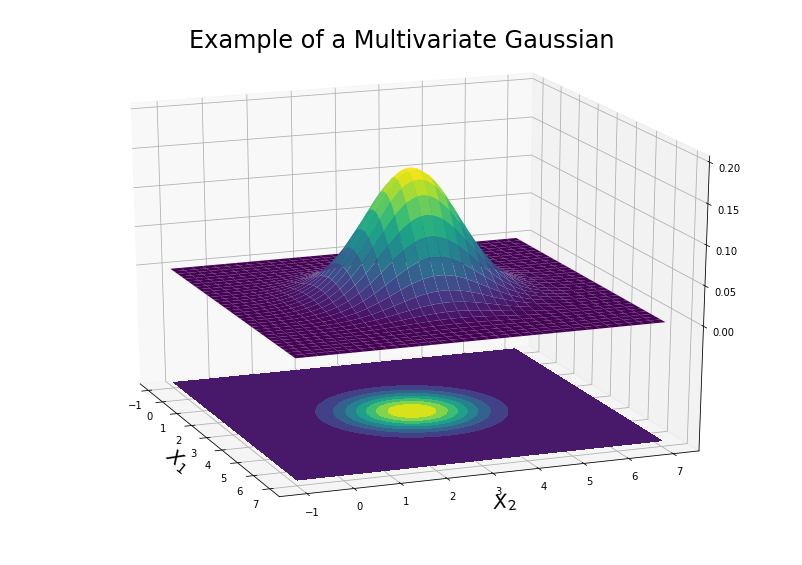

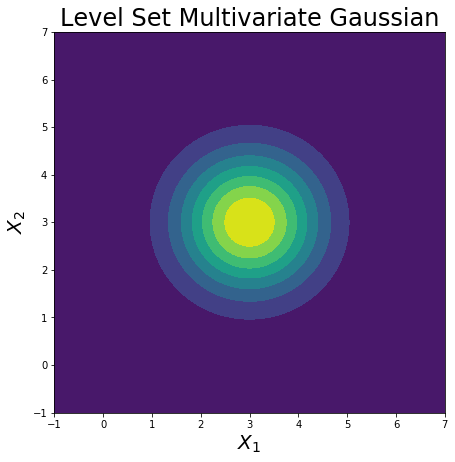

In [42]:
# We will see the first case:

mu = np.array([3,3])
Sigma = np.array([[1, 0], [0, 1]]) #must be a symmetric, invertible matrix
print(Sigma==Sigma.T)
parameters=[mu,Sigma]
data=[]

pos_init=np.array([0,0])
number_iter=4000
gamma=0.01

# Plot for visualization:

plt.rcParams['figure.figsize'] = (14, 10)
# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(-1, 7, N)
Y = np.linspace(-1, 7, N)
X, Y = np.meshgrid(X, Y)
# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, parameters)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True, cmap=cm.viridis)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(20, -21)
plt.xlabel(r'$X_1$', fontsize=20)
plt.ylabel(r'$X_2$', fontsize=20)
plt.title(r'Example of a Multivariate Gaussian', fontsize=24)
plt.show()

plt.rcParams['figure.figsize'] = (7,7)

Z = multivariate_gaussian(pos, parameters)
fig, ax = plt.subplots()
ax.set_xlim(-1,7)
ax.set_ylim(-1,7)
plt.xlabel(r'$X_1$', fontsize=20)
plt.ylabel(r'$X_2$', fontsize=20)
plt.title(r'Level Set Multivariate Gaussian', fontsize=24)
ax.contourf(X,Y,Z,cmap='viridis')

In [43]:
# Sampling:
%time
[Time,Position,Velocity]=ZIGZAG_Gaussian(parameters,rate,bound,cinlar,data,gamma,pos_init,number_iter)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.72 µs


(-1, 7)

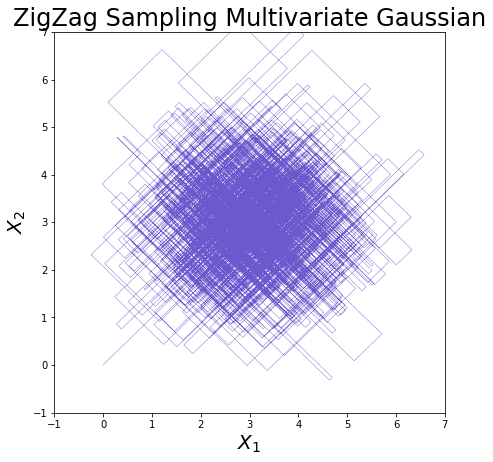

In [44]:
# Sampling:

plt.clf()
plt.rcParams['figure.figsize'] = (7,7)
plt.figure(1)
plt.plot(Position[0,:], Position[1,:], color='slateblue', ms=2, linewidth=0.4)
plt.xlabel(r'$X_1$', fontsize=20)
plt.ylabel(r'$X_2$', fontsize=20)
plt.title(r'ZigZag Sampling Multivariate Gaussian', fontsize=24)
axes = plt.gca()
axes.set_xlim([-1,7])
axes.set_ylim([-1,7])

Text(0.5,0,'Iteration')

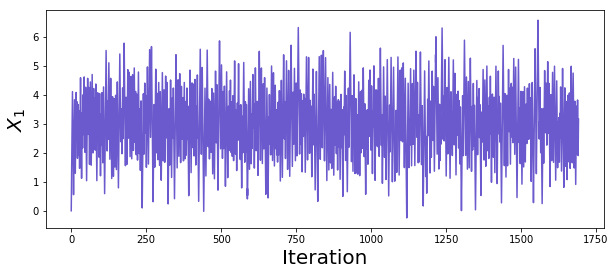

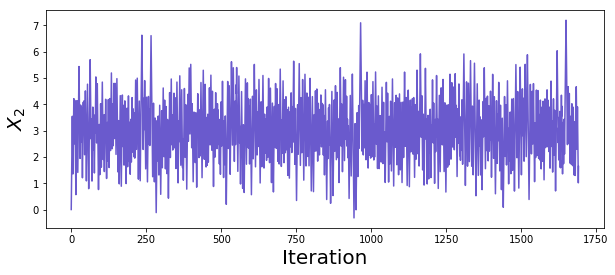

In [45]:
plt.rcParams['figure.figsize'] = (10,4)
plt.figure(2)
plt.plot(Time,Position[0,:],color = 'slateblue')
plt.ylabel(r'$X_1$', fontsize=20)
plt.xlabel('Iteration', fontsize=20)

plt.figure(3)
plt.plot(Time,Position[1,:],color = 'slateblue')
plt.ylabel(r'$X_2$', fontsize=20)
plt.xlabel('Iteration', fontsize=20)


## TWO MULTIVARIATE GAUSSIAN


Let's analyse the case of a Bimodal Gaussian Distribution: $N(\mu_1, \Sigma_1)$ and $N(\mu_2, \Sigma_2)$


### Calculate the Gradient of the Potential of the Negative Loglikelihood:

Likelihood: $\pi (\xi) = \frac{1}{\sqrt{det(2 \pi \Sigma_1)}} \alpha_1 e^{-\frac{1}{2} (\xi - \mu_1)^t \Sigma_1 (\xi - \mu_1)} + \frac{1}{\sqrt{det(2 \pi \Sigma_2)}} \alpha_2 e^{-\frac{1}{2} (\xi - \mu_2)^t \Sigma_2 (\xi - \mu_2)}$, in which $\alpha_1 + \alpha_2 = 1$.  

The PotentialS $\Psi(\xi)$ are:

$$
\Psi_1(\xi) = \frac{1}{2} (\xi - \mu_1)^t \Sigma_1 (\xi - \mu_1) = \frac{1}{2} \sum_{j=1}^d \sum_{k=1}^d (\xi_k - \mu_{1k}) (\xi_j - \mu_{1j}) \Sigma_{1kj}.
$$

$$
\Psi_2(\xi) = \frac{1}{2} (\xi - \mu_2)^t \Sigma_2 (\xi - \mu_2) = \frac{1}{2} \sum_{j=1}^d \sum_{k=1}^d (\xi_k - \mu_{2k}) (\xi_j - \mu_{2j}) \Sigma_{2kj}
$$

The gradients are constructed by: 

$$
\frac{\partial \Psi_1(\xi)}{\partial \xi_i} = \sum_{j=1}^d (\xi_j - \mu_{1j}) \Sigma_{1ij}
$$

$$
\frac{\partial \Psi_2(\xi)}{\partial \xi_i} = \sum_{j=1}^d (\xi_j - \mu_{2j}) \Sigma_{2ij}
$$

### Calculate the Event Rate:

We just introduce the values:

For each dimension, let us choose a constant $\gamma_i(\xi) = \gamma_i$ that works fine with the data:

$$\lambda_i(\xi, \theta) = \max \{0, \theta_i ( \alpha_1 \frac{\partial \Psi_1(\xi)}{\partial \xi_i} + \alpha_2 \frac{\partial \Psi_2(\xi)}{\partial \xi_i}) \} + \gamma_i$$

### Find a Computational Bound for the Event Rate:

The event rate is calculated as: $m_i(t) = \lambda_i(\Xi^{k-1} + \Theta^{k-1}t, \Theta^{k-1}) = \max \{0, \Theta_i^{k-1} (\alpha_1 \frac{\partial \Psi_1(\Xi^{k-1} + \Theta^{k-1}t)}{\partial \xi_i} + \alpha_2  \frac{\partial \Psi_2(\Xi^{k-1} + \Theta^{k-1}t)}{\partial \xi_i}) \} + \gamma_i$ in $d$ dimentions and at the $k$ iteration. After some algebra, the event rate can be summarized as:

$$
m_i(t) = \max \left\{0, \,\Theta_i^{k-1}\sum_{j=1}^d [ \alpha_1 \Sigma_{1ij}\left( \Xi_j^{k-1}-\mu_{1j} + \Theta_j^{k-1}t \right) + \alpha_2 \Sigma_{2ij}\left( \Xi_j^{k-1}-\mu_{2j} + \Theta_j^{k-1}t \right) ]  \right\} + \gamma_i 
$$


Then, the Computational Bound $M_i(t)$ must satisfy: $m_i(t) \leq M(_it)$, so the main candidate is:

$$
M_i(t) =\sum_{j=1}^d  \alpha_1 \left| \Sigma_{1ij}\right| \left(\left| \Xi_j^{k-1}-\mu_{1j}\right| +t \right) + \alpha_2 \left| \Sigma_{2ij}\right| \left(\left| \Xi_j^{k-1}-\mu_{2j}\right| +t \right)  + \gamma_i
$$

Let us define:
$$ a_i = \sum_{j=1}^d  \alpha_1 \left| \Sigma_{1ij}\right|\left| \Xi_j^{k-1}-\mu_{1j}\right| + \alpha_2 \left| \Sigma_{2ij}\right|\left| \Xi_j^{k-1}-\mu_{2j}\right| + \gamma_i, \quad \quad b_i = \sum_{j=1}^d  \left| \Sigma_{1ij}\right| + \left| \Sigma_{2ij}\right|  
$$

Then: 

$$
M_i(t) = a_i + b_i \cdot t
$$

Then $M_i(t)$ can be described as an affine function, just like in de case of the 1-D Gaussian.

### Draw times from a Poisson Process:

As the $M_i(t)$ has primitive and achieve the hypothesis, we use the Çinlar method to compute the times: $\Lambda_i(t) = \int_0^t (a_i + b_i s)\, ds = a_it + \frac{b_it^2}{2}$

Then we follow the steps of the Çinlar Algorithm:

For $i = 1, ..., d$:

1. $u_i \sim U(0,1)$
2. $s_i = - log(u_i)$
3. 
\begin{align*}
\tau_i &= \inf\left\{v \geq 0: \Lambda(v) \geq s_i\right\} = \inf\left\{v \geq 0: a_iv + \frac{b_iv^2}{2} \geq s_i\right\} =  \frac{\sqrt{a_i^2 + 2b_is_i}-a_i}{b_i}.
\end{align*}

### Minimum Time:

The minimum time is calculated: 

$i_0 = $ argmin $\{\tau_i \}$

$\tau = \tau_{i0}$

### Compute the specific algorithm:

If there are $K$ iterations:

1. $(T^0, \Xi^0, \Theta^0) := (0, \xi, \theta)$

2. for $k=1,\,2,\dots,K$,
    
    (a) For $t \geq 0$ and $i = 1, ..., d$, define $m_i(t) = \max \left\{0, \,\Theta_i^{k-1}\sum_{j=1}^d [ \alpha_1 \Sigma_{1ij}\left( \Xi_j^{k-1}-\mu_{1j} + \Theta_j^{k-1}t \right) + \alpha_2 \Sigma_{2ij}\left( \Xi_j^{k-1}-\mu_{2j} + \Theta_j^{k-1}t \right) ]  \right\} + \gamma_i$

    (b) Computational Bound: for $t \geq 0$ and $i = 1, ..., d$, define $M_i(t) = a_i + b_it$ with
    
    $$a_i = \sum_{j=1}^d  \alpha_1 \left| \Sigma_{1ij}\right|\left| \Xi_j^{k-1}-\mu_{1j}\right| + \alpha_2 \left| \Sigma_{2ij}\right|\left| \Xi_j^{k-1}-\mu_{2j}\right| + \gamma_i, \quad \quad b_i = \sum_{j=1}^d  \left| \Sigma_{1ij}\right| + \left| \Sigma_{2ij}\right|$$
    
    (c)  For $i = 1, \dots, d$: sample $u_i \sim U(0,1)$, calculate $\tau_i= \frac{\sqrt{a_i^2 + 2b_is_i}-a_i}{b_i}$, so that $\mathbb{P}(\tau_i \geq t) = \exp(-\int_0^t M_{i}(s) ds)$, and take $\tau =\min  \tau_i, \, i_0 =\arg \min \tau_i$.
    
    (e) $(T^{k}, \Xi^{k})$ := $(T^{k-1} + \tau, \Xi^{k-1} + \Theta^{k-1}\tau)$
    
    (f) With probability $m_{i0}(\tau)/M_{i0}(\tau)$:
        
$$
\Theta^k := F_{i_0}(\Theta^{k-1})
$$

>Otherwise:
        
$$
\Theta^k := \Theta^{k-1}
$$

In [46]:
def two_multivariate_gaussian(pos, parameters):
    """
    Input:
        pos[ndarray]: position
        parameters[list of ndarray]: known parameters means and covariance matrixes
    Output:
        exp[float]: the value of the multivariete gaussian

    """
    mu1 = parameters[0][0]
    mu2 = parameters[0][1]
    n = mu1.shape[0]
    Sigma1 = parameters[1][0]
    Sigma2 = parameters[1][1]
    w = parameters[2]
    
    Sigma1_det = np.linalg.det(Sigma1)
    Sigma2_det = np.linalg.det(Sigma2)
    Sigma1_inv = np.linalg.inv(Sigma1)
    Sigma2_inv = np.linalg.inv(Sigma2)

    N1 = np.sqrt((2*np.pi)**n * Sigma1_det)
    N2 = np.sqrt((2*np.pi)**n * Sigma2_det)
    fac1 = np.einsum('...k,kl,...l->...', pos-mu1, Sigma1_inv, pos-mu1)
    fac2 = np.einsum('...k,kl,...l->...', pos-mu2, Sigma2_inv, pos-mu2)    
    exp = np.exp(-fac1 / 2) / N1 * w + np.exp(-fac2 / 2) / N2 * (1-w)
    return exp

In [47]:
def rate_2_Gaussians(i,t,pos,vel,parameters,data,gamma):
    """
    Input:
        i[int]: index of the dimension
        t[float]: time
        pos[ndarray]: position
        vel[ndarray]: velocity
        parameters[list of ndarray]: known parameters mean and covariance matrix
        data[list of ndarray]: dataset
        gamma[float]: additional fixed rate ensuring ergodicity
    Output:
        la[float]

    """
    mu_1=parameters[0][0]
    mu_2=parameters[0][1]    
    Sigma_1_i=np.linalg.inv(parameters[1][0])[i,:]
    Sigma_2_i=np.linalg.inv(parameters[1][1])[i,:]
    Sigma_1_i_i = Sigma_1_i[i]
    Sigma_2_i_i = Sigma_2_i[i]
    weight = parameters[2]
    
    exp_1 = weight * np.exp(-0.5*(pos-mu_1)@Sigma_1@(pos-mu_1))
    exp_2 = (1 - weight) * np.exp(-0.5*(pos-mu_2)@Sigma_2@(pos-mu_2))
    
    pond_1 = exp_1 / (exp_1 + exp_2)
    pond_2 = exp_2 / (exp_1 + exp_2)

    la_1 = vel[i] * Sigma_1_i@(pos-mu_1+t*vel)
    la_2 = vel[i] * Sigma_2_i@(pos-mu_2+t*vel)

    la = max(0, (la_1 * pond_1 + la_2 * pond_2)) + gamma

    return la

In [48]:
def bound_2_Gaussians(i,t,pos,vel,parameters,data,gamma):
    """
    Input:
        i[int]: index of the dimension
        t[float]: time
        pos[ndarray, shape=(d,)]: position
        vel[ndarray, shape=(d,)]: velocity
        parameters[list of ndarray]: known parameters mean and covariance matrix
        data[list of ndarray]: dataset
        gamma[float]: additional fixed rate ensuring ergodicity
    Output: 
        la[float]     
    """
    
    mu_1=parameters[0][0]
    mu_2=parameters[0][1]    
    Sigma_1_i=np.linalg.inv(parameters[1][0])[i,:]
    Sigma_2_i=np.linalg.inv(parameters[1][1])[i,:]
    Sigma_1_i_i = Sigma_1_i[i]
    Sigma_2_i_i = Sigma_2_i[i]
    weight = parameters[2]
    
    exp_1 = weight * np.exp(-0.5*(pos-mu_1)@Sigma_1@(pos-mu_1))
    exp_2 = (1 - weight) * np.exp(-0.5*(pos-mu_2)@Sigma_2@(pos-mu_2))
    
    der_1 = np.sum(Sigma_1_i)
    der_2 = np.sum(Sigma_2_i)
    
    der = ((exp_1 * der_1) + (exp_2 * der_2)) / (exp_1 + exp_2)
    
    a = np.abs(der)+gamma
    b = np.sum(np.abs(Sigma_1) + np.abs(Sigma_2))
    la = a + b * t

    return la

In [49]:
def cinlar_2_Gaussians(TimesIn,pos,vel,parameters,data,gamma):
    """
    Input:
        TimesIn[ndarray, shape=(d,)]: d-dim vector
        pos[ndarray, shape=(d,)]: position
        vel[ndarray, shape=(d,)]: velocity
        parameters[list of ndarray]: known parameters mean and covariance matrix
        data[list of ndarray]: dataset
        gamma[float]: additional fixed rate ensuring ergodicity
    Output: 
        TimesOut[ndarray, shape=(d,)]
    """

    mu_1=parameters[0][0]
    mu_2=parameters[0][1]   
    Sigma_1 = np.linalg.inv(parameters[1][0])
    Sigma_2 = np.linalg.inv(parameters[1][1])
    weight = parameters[2]
    
    exp_1 = weight * np.exp(-0.5*(pos-mu_1)@Sigma_1@(pos-mu_1))
    exp_2 = (1 - weight) * np.exp(-0.5*(pos-mu_2)@Sigma_2@(pos-mu_2))
   
    a_i = np.array([])
    b = np.array([])
    
    for i in range(len(TimesIn)):
    
        Sigma_1_i = np.linalg.inv(parameters[1][0])[i,:]
        Sigma_2_i = np.linalg.inv(parameters[1][1])[i,:]
        Sigma_1_i_i = Sigma_1_i[i]
        Sigma_2_i_i = Sigma_2_i[i]

        der_1 = np.sum(Sigma_1_i)
        der_2 = np.sum(Sigma_2_i)
    
        
        der = ((exp_1 * der_1) + (exp_2 * der_2)) / (exp_1 + exp_2)

        a_i = np.append(a_i, np.abs(der))
        b = np.append(b, np.sum(np.abs(Sigma_1) + np.abs(Sigma_2)))

    a = a_i + gamma

    TimesOut=np.sqrt(a*a+2*b*TimesIn)-a
    TimesOut=np.divide(TimesOut,b,out=np.divide(TimesIn,a),where=(b!=0))

    return TimesOut

[[ True  True]
 [ True  True]]
[[ True  True]
 [ True  True]]


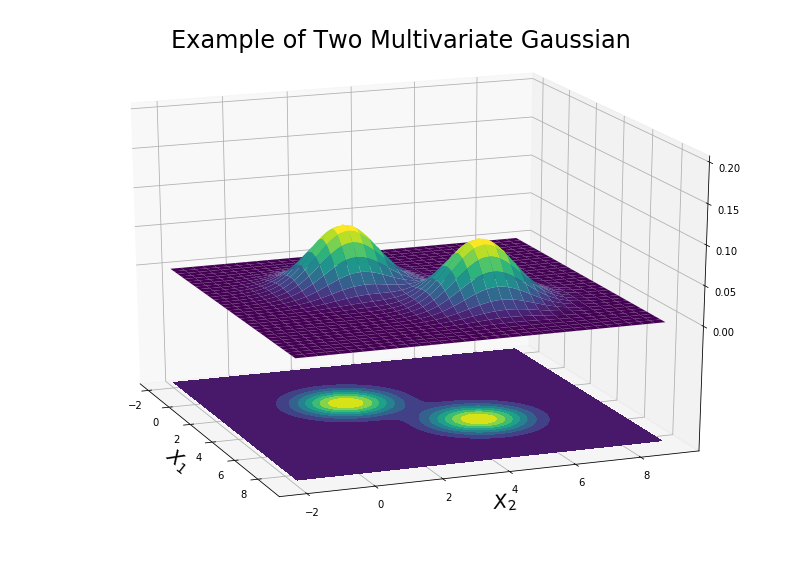

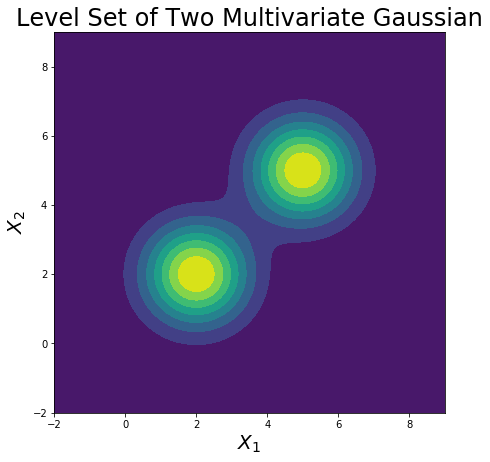

In [50]:
mu_2=np.array( [2, 2] )
mu_1=np.array( [5, 5] )

Sigma_1=np.array([[1, 0], [0, 1]]) #must be a symmetric, invertible matrix
Sigma_2=np.array([[1, 0], [0, 1]]) #must be a symmetric, invertible matrix
data=[]

w = 0.5
print(Sigma_1==Sigma_1.T)
print(Sigma_2==Sigma_2.T)

parameters=[[mu_1, mu_2], [Sigma_1, Sigma_2], w]


pos_init=np.array([0,2])
number_iter=15000
gamma=0.01

plt.rcParams['figure.figsize'] = (14, 10)

# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(-2, 9, N)
Y = np.linspace(-2, 9, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mus = parameters[0]
Sigmas = parameters[1]
w = parameters[2]

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# The distribution on the variables X, Y packed into pos.
Z = two_multivariate_gaussian(pos, parameters)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(20, -21)

plt.xlabel(r'$X_1$', fontsize=20)
plt.ylabel(r'$X_2$', fontsize=20)
plt.title(r'Example of Two Multivariate Gaussian', fontsize=24)

plt.show()

plt.rcParams['figure.figsize'] = (7,7)

Z = two_multivariate_gaussian(pos, parameters)
fig, ax = plt.subplots()
ax.set_xlim(-2,9)
ax.set_ylim(-2,9)
ax.contourf(X,Y,Z,cmap='viridis')
plt.xlabel(r'$X_1$', fontsize=20)
plt.ylabel(r'$X_2$', fontsize=20)
plt.title(r'Level Set of Two Multivariate Gaussian', fontsize=24)
ax.contourf(X,Y,Z,cmap='viridis')

In [51]:
%time

[Time,Position,Velocity]=ZIGZAG_Gaussian(parameters,rate_2_Gaussians,bound_2_Gaussians,cinlar_2_Gaussians,data,gamma,pos_init,number_iter)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 10 µs


(-2, 9)

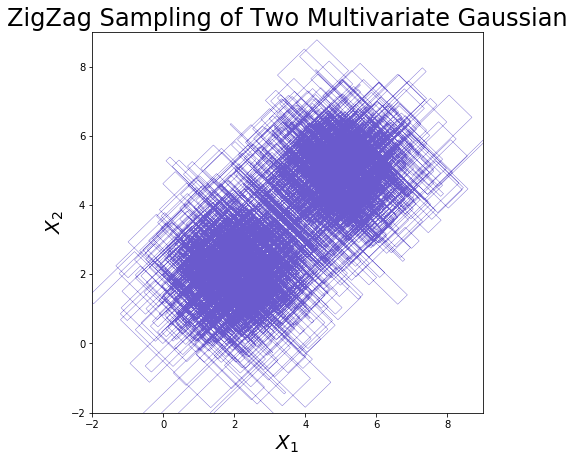

In [52]:
# Sampling:

plt.clf()
plt.rcParams['figure.figsize'] = (7,7)
plt.figure(1)
plt.plot(Position[0,:], Position[1,:], color='slateblue', ms=2, linewidth=0.4)
plt.xlabel(r'$X_1$', fontsize=20)
plt.ylabel(r'$X_2$', fontsize=20)
plt.title(r'ZigZag Sampling of Two Multivariate Gaussian', fontsize=24)
axes = plt.gca()
axes.set_xlim([-2,9])
axes.set_ylim([-2,9])

Text(0.5,0,'Iteration')

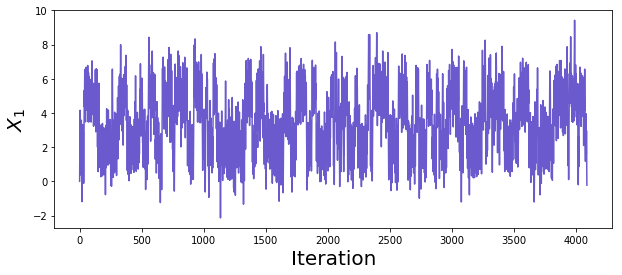

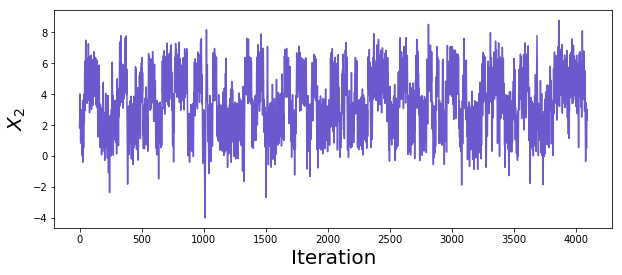

In [53]:
plt.rcParams['figure.figsize'] = (10,4)
plt.figure(2)
plt.plot(Time,Position[0,:],color = 'slateblue')
plt.ylabel(r'$X_1$', fontsize=20)
plt.xlabel('Iteration', fontsize=20)

plt.figure(3)
plt.plot(Time,Position[1,:],color = 'slateblue')
plt.ylabel(r'$X_2$', fontsize=20)
plt.xlabel('Iteration', fontsize=20)

## MULTIVARIATE GAUSSIAN BOUNDED AS A LIPZCHITZ


The main difference between this code and the one before, is that the way the computational bound is achieved:

The bound used before was the reverse triangle inequality. We can develop this more considering that the function is Lipschitz continuous, so then exists a positive real constant $C_i$ for $i = 1, ..., d$ such that, for all real $\xi_1$ and $\xi_2$: $|\partial_i \Psi(\xi_1) - \partial_i \Psi(\xi_2)| \leq C_i \cdot \left\lVert \xi_1 - \xi_2 \right\rVert$

In particular, we can delimit the computational bound as:

$$
m_i(t) = \max \{0, \theta_i \frac{\partial \Psi(\Xi^{k-1} + \Theta^{k-1}t)}{\partial \xi_i} \} + \gamma_i \leq |\frac{\partial \Psi(\Xi^{k-1} + \Theta^{k-1}t)}{\partial \xi_i}| + \gamma_i
$$

$$
m_i(t) \leq |\frac{\partial \Psi(\Xi^{k-1} + \Theta^{k-1}t)}{\partial \xi_i} - \frac{\partial \Psi(\Xi^{k-1})}{\partial \xi_i}| + |\frac{\partial \Psi(\Xi^{k-1})}{\partial \xi_i}| + \gamma_i
$$

Using that the function $\frac{\partial \Psi(\xi)}{\partial \xi_i}$ is Lipschitz continuous:

$$
m_i(t) \leq C_i \cdot \left\lVert \Theta_i^{k-1} \cdot t \right\rVert + |\frac{\partial \Psi(\Xi^{k-1})}{\partial \xi_i}| + \gamma_i \leq C_i \cdot t \cdot \sqrt{d} + |\frac{\partial \Psi(\Xi^{k-1})}{\partial \xi_i}| + \gamma_i = M_i(t)
$$

And in particular the value $C_i$ equals to the matrix of norm:

If $f: \mathbb{R}^d \rightarrow \mathbb{R}^p$ is lipschitz, then:

$$
\left\lVert f(x) - f(y) \right\rVert_d = \left\lVert A \cdot x - A \cdot y \right\rVert_p = \left\lVert A \cdot (x - y) \right\rVert_p \leq \left\lVert A \right\rVert_p \left\lVert (x-y) \right\rVert_p
$$

So the constant $C_i$ is equal to the matrix norm of the eigen matrix function $\frac{\partial \Psi(\xi)}{\partial \xi_i}$. In particular: $\left\lVert A \right\rVert_2 =$ max$\{\lambda_i (A^t A) \}$, with $\lambda_i$ the eigenvalues, with $i = 1, ..., d$.

Then the computational bound achieves the form:

$$
M_i(t) = a + b \cdot t
$$

With $a = |\frac{\partial \Psi(\Xi^{k-1})}{\partial \xi_i}| + \gamma_i$ and $b = C_i \cdot \sqrt{d}$

The rest of the algorithm stays the same.

In [54]:
def bound_lipschitz(i,t,pos,vel,parameters,data,gamma): # debo editar esta bergaa
    """
    Input:
        i[int]: index of the dimension
        t[float]: time
        pos[ndarray, shape=(d,)]: position
        vel[ndarray, shape=(d,)]: velocity
        parameters[list of ndarray]: known parameters mean and covariance matrix
        data[list of ndarray]: dataset
        gamma[float]: additional fixed rate ensuring ergodicity
    Output: 
        la[float]     
    """
    mu=parameters[0]
    Sigma_i=np.linalg.inv(parameters[1])[i,:]
    Sigma_i_i = Sigma_i[i]

    a = 0.5 * np.abs(Sigma_i@(pos-mu)) + 0.5 * np.abs(Sigma_i_i*(pos[i]-mu[i])) + gamma
    b = np.abs(0.5 * (np.sum(Sigma_i) + Sigma_i_i))

    la=a+b*t
    
    return la

In [55]:
mu = np.array([3,3])
Sigma = np.array([[1, 0], [0, 1]]) #must be a symmetric, invertible matrix
print(Sigma==Sigma.T)
parameters=[mu,Sigma]
data=[]


pos_init=np.array([0,0])
number_iter=4000
gamma=0.01

[[ True  True]
 [ True  True]]


In [56]:
%time

[Time,Position,Velocity]=ZIGZAG_Gaussian(parameters,rate,bound_lipschitz,cinlar,data,gamma,pos_init,number_iter)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.96 µs


(-1, 7)

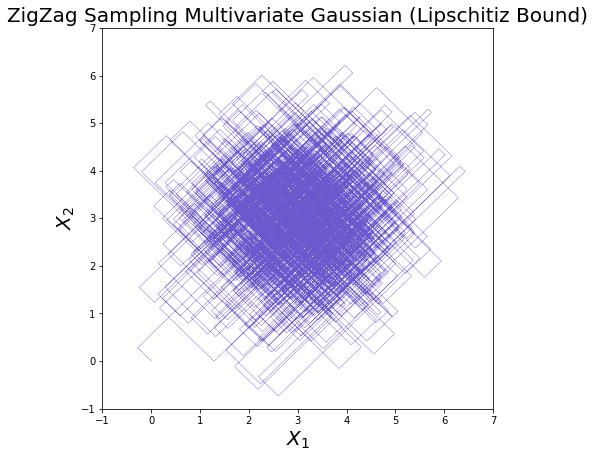

In [57]:
# Sampling:
plt.rcParams['figure.figsize'] = (7,7)

plt.clf()
plt.figure(1)
plt.plot(Position[0,:], Position[1,:], color='slateblue', ms=2, linewidth=0.4)
plt.xlabel(r'$X_1$', fontsize=20)
plt.ylabel(r'$X_2$', fontsize=20)
plt.title(r'ZigZag Sampling Multivariate Gaussian (Lipschitiz Bound)', fontsize=20)
axes = plt.gca()
axes.set_xlim([-1,7])
axes.set_ylim([-1,7])

Text(0.5,0,'Iteration')

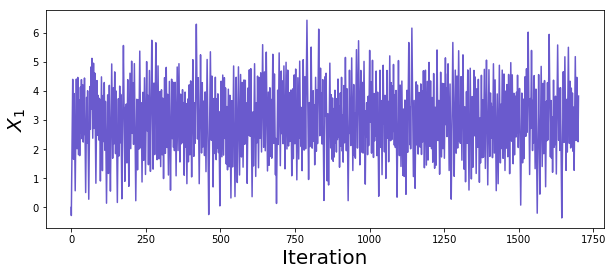

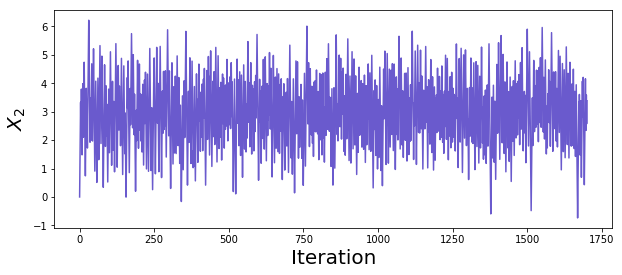

In [58]:
plt.rcParams['figure.figsize'] = (10,4)
plt.figure(2)
plt.plot(Time,Position[0,:],color = 'slateblue')
plt.ylabel(r'$X_1$', fontsize=20)
plt.xlabel('Iteration', fontsize=20)

plt.figure(3)
plt.plot(Time,Position[1,:],color = 'slateblue')
plt.ylabel(r'$X_2$', fontsize=20)
plt.xlabel('Iteration', fontsize=20)


In [59]:
# Let's Compare the bounds:

mu = np.array([10,10])
Sigma = np.array([[1, 0.5], [0.5, 3]]) #must be a symmetric, invertible matrix
print(Sigma==Sigma.T)
parameters=[mu,Sigma]
data=[]


pos_init=np.array([0,0])
number_iter=1500
gamma=0.01

[[ True  True]
 [ True  True]]


In [60]:
[Time1,Position1,Velocity1]=ZIGZAG_Gaussian(parameters,rate,bound,cinlar,data,gamma,pos_init,number_iter)
[Time2,Position2,Velocity2]=ZIGZAG_Gaussian(parameters,rate,bound_lipschitz,cinlar,data,gamma,pos_init,number_iter)

Text(0.5,1,'ZigZag Sampling Multivariate Gaussian (Lipschitiz Bound)')

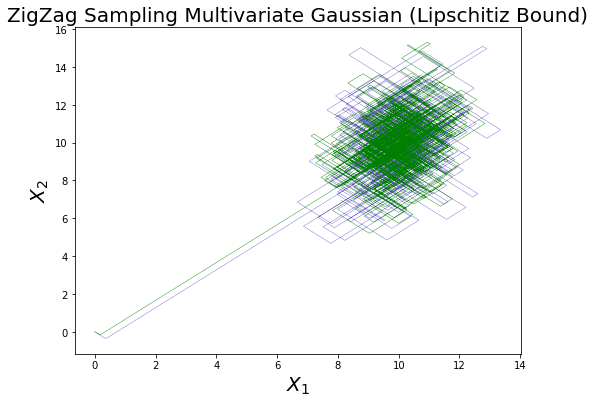

In [61]:
# Sampling:
plt.rcParams['figure.figsize'] = (8,6)


plt.clf()
plt.figure(1)
plt.plot(Position1[0,:], Position1[1,:], color='slateblue', ms=2, linewidth=0.4)
plt.plot(Position2[0,:], Position2[1,:], color='green', ms=2, linewidth=0.4)
plt.xlabel(r'$X_1$', fontsize=20)
plt.ylabel(r'$X_2$', fontsize=20)
plt.title(r'ZigZag Sampling Multivariate Gaussian (Lipschitiz Bound)', fontsize=20)


Text(0.5,0,'Iteration')

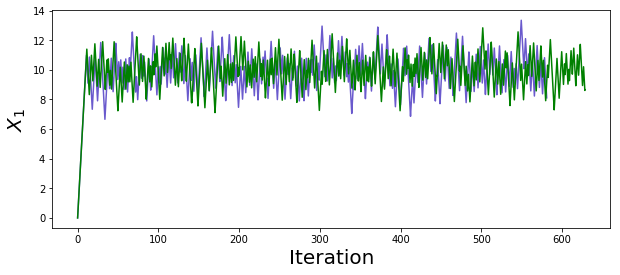

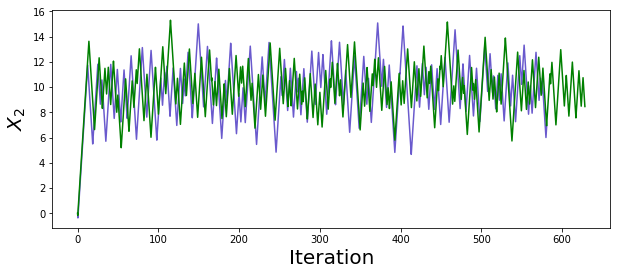

In [62]:
plt.rcParams['figure.figsize'] = (10,4)
plt.figure(2)
plt.plot(Time1,Position1[0,:],color = 'slateblue')
plt.plot(Time2,Position2[0,:],color = 'green')
plt.ylabel(r'$X_1$', fontsize=20)
plt.xlabel('Iteration', fontsize=20)

plt.figure(3)
plt.plot(Time1,Position1[1,:],color = 'slateblue')
plt.plot(Time2,Position2[1,:],color = 'green')
plt.ylabel(r'$X_2$', fontsize=20)
plt.xlabel('Iteration', fontsize=20)